In [2]:
import pandas as pd
import numpy as np

In [10]:
import warnings

In [30]:
n_estudiantes_a = 500
df_a = pd.DataFrame({
    'Puntaje': np.random.normal(loc=72, scale=12, size=n_estudiantes_a).clip(0, 100),
    'Edad': np.random.choice([14, 15, 16, 17, 18], size=n_estudiantes_a, p=[0.15, 0.25, 0.30, 0.20, 0.10]),
    'Género': np.random.choice(['M', 'F'], size=n_estudiantes_a, p=[0.48, 0.52]),
    'Escuela': np.random.choice(['Pública', 'Privada', 'Subvencionada'], size=n_estudiantes_a, p=[0.60, 0.25, 0.15]),
    'Comuna': 'Comuna A'
})


In [31]:
df_a

,Puntaje,Edad,Género,Escuela,Comuna
0,56.581818,14,F,Pública,Comuna A
1,64.910585,15,M,Privada,Comuna A
2,72.569686,16,F,Pública,Comuna A
3,85.635518,15,F,Privada,Comuna A
4,98.943627,17,M,Pública,Comuna A
...,...,...,...,...,...
495,58.568388,15,M,Privada,Comuna A
496,43.141068,15,M,Pública,Comuna A
497,70.881871,17,M,Subvencionada,Comuna A
498,64.900111,18,M,Pública,Comuna A


# Tipos de variables

In [32]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Puntaje  500 non-null    float64
 1   Edad     500 non-null    int64  
 2   Género   500 non-null    object 
 3   Escuela  500 non-null    object 
 4   Comuna   500 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 19.7+ KB


In [33]:
df_a.columns

Index(['Puntaje', 'Edad', 'Género', 'Escuela', 'Comuna'], dtype='object')

In [35]:
# {'Puntaje':"Cuantitativa continua", 'Edad':"Cuantitativa discreta", 'Género':"Cualitativa nominal", 'Escuela':"Cualitativa nominal", 'Comuna':"Cualitativa nominal"]

In [36]:
df_a["Edad"].unique()

array([14, 15, 16, 17, 18])

In [37]:
df_a["Género"].unique()

array(['F', 'M'], dtype=object)

In [38]:
df_a["Escuela"].unique()

array(['Pública', 'Privada', 'Subvencionada'], dtype=object)

# Analizar frecuencias

In [62]:
desviacion_puntaje = df_a['Puntaje'].std()
print(f"Desviación estándar del puntaje: {desviacion_puntaje}")

Desviación estándar del puntaje: 11.846689451772562


In [52]:
df_a.describe(include='all')

,Puntaje,Edad,Género,Escuela,Comuna
count,500.000000,500.00000,500,500,500
unique,NaN,NaN,2,3,1
top,NaN,NaN,F,Pública,Comuna A
freq,NaN,NaN,255,299,500
mean,71.543320,15.85600,NaN,NaN,NaN
std,11.846689,1.21252,NaN,NaN,NaN
min,23.439703,14.00000,NaN,NaN,NaN
25%,63.910087,15.00000,NaN,NaN,NaN
50%,71.498910,16.00000,NaN,NaN,NaN
75%,79.864615,17.00000,NaN,NaN,NaN


<Axes: ylabel='Frequency'>

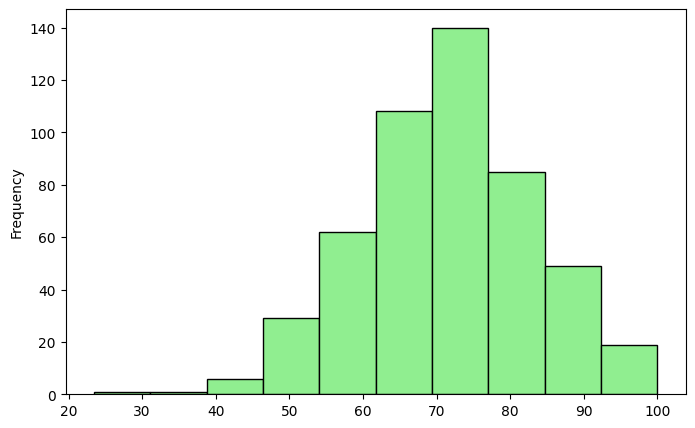

In [40]:

# Generar histograma usando el método de pandas
df_a['Puntaje'].plot(kind='hist', bins=10, color='lightgreen', edgecolor='black', figsize=(8, 5))


dado el gráfico, la distribucion es normal y simétrica centrada en los 71.5 puntos

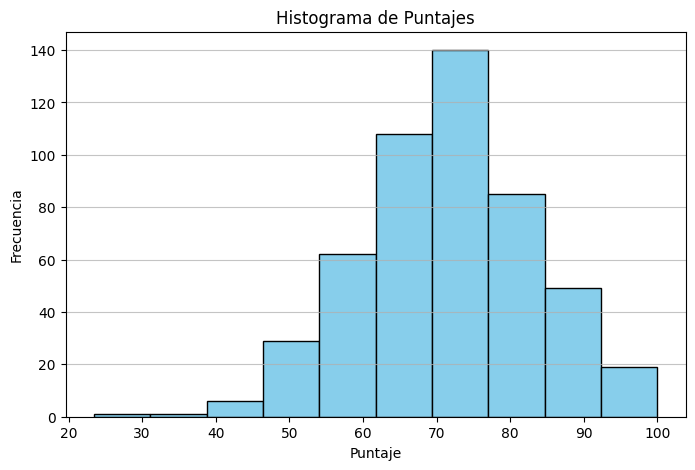

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df_a['Puntaje'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Puntajes')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.savefig('histograma.jpeg')
plt.show()

<Axes: ylabel='Frequency'>

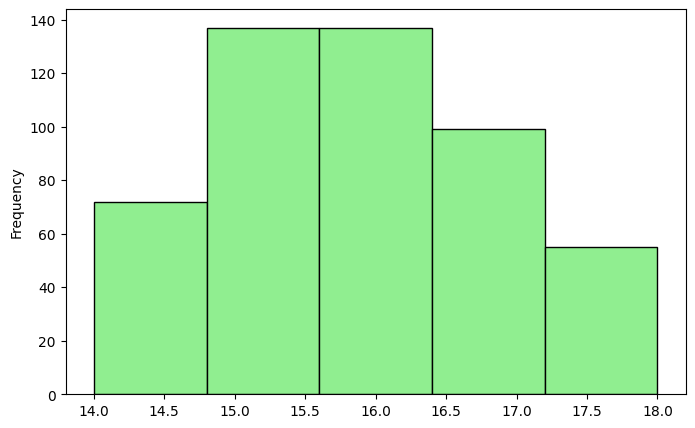

In [54]:
# Generar histograma usando el método de pandas
df_a['Edad'].plot(kind='hist', bins=5, color='lightgreen', edgecolor='black', figsize=(8, 5))

In [42]:
df_a['Edad'].value_counts()

,count
Edad,
15,137
16,137
17,99
14,72
18,55


In [43]:
frecuencia_abs = df_a['Edad'].value_counts().sort_index()
frecuencia_rel = df_a['Edad'].value_counts(normalize=True).sort_index() * 100
frecuencia_acum_abs = frecuencia_abs.cumsum()
frecuencia_acum_rel = frecuencia_rel.cumsum()

tabla_frecuencias_edad = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_abs,
    'Frecuencia Relativa (%)': frecuencia_rel,
    'Frecuencia Acumulada Abs.': frecuencia_acum_abs,
    'Frecuencia Acumulada Rel. (%)': frecuencia_acum_rel
})

tabla_frecuencias_edad

,Frecuencia Absoluta,Frecuencia Relativa (%),Frecuencia Acumulada Abs.,Frecuencia Acumulada Rel. (%)
Edad,,,,
14,72,14.4,72,14.4
15,137,27.4,209,41.8
16,137,27.4,346,69.2
17,99,19.8,445,89.0
18,55,11.0,500,100.0


In [44]:
frecuencia_abs = df_a['Género'].value_counts().sort_index()
frecuencia_rel = df_a['Género'].value_counts(normalize=True).sort_index() * 100
frecuencia_acum_abs = frecuencia_abs.cumsum()
frecuencia_acum_rel = frecuencia_rel.cumsum()

tabla_frecuencias_genero = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_abs,
    'Frecuencia Relativa (%)': frecuencia_rel,
    'Frecuencia Acumulada Abs.': frecuencia_acum_abs,
    'Frecuencia Acumulada Rel. (%)': frecuencia_acum_rel
})

tabla_frecuencias_genero

,Frecuencia Absoluta,Frecuencia Relativa (%),Frecuencia Acumulada Abs.,Frecuencia Acumulada Rel. (%)
Género,,,,
F,255,51.0,255,51.0
M,245,49.0,500,100.0


In [45]:
frecuencia_abs = df_a['Escuela'].value_counts().sort_index()
frecuencia_rel = df_a['Escuela'].value_counts(normalize=True).sort_index() * 100
frecuencia_acum_abs = frecuencia_abs.cumsum()
frecuencia_acum_rel = frecuencia_rel.cumsum()

tabla_frecuencias_escuela = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_abs,
    'Frecuencia Relativa (%)': frecuencia_rel,
    'Frecuencia Acumulada Abs.': frecuencia_acum_abs,
    'Frecuencia Acumulada Rel. (%)': frecuencia_acum_rel
})

tabla_frecuencias_escuela

,Frecuencia Absoluta,Frecuencia Relativa (%),Frecuencia Acumulada Abs.,Frecuencia Acumulada Rel. (%)
Escuela,,,,
Privada,120,24.0,120,24.0
Pública,299,59.8,419,83.8
Subvencionada,81,16.2,500,100.0


In [61]:
moda_escuela = df_a['Escuela'].mode()[0]
print(f"La moda de la variable Escuela es: {moda_escuela}")

La moda de la variable Escuela es: Pública


# Medidas de dispersión

In [56]:
rango_puntaje=df_a["Puntaje"].max()-df_a["Puntaje"].min()
rango_puntaje

76.56029721861528

In [57]:
rango_edad=df_a["Edad"].max()-df_a["Edad"].min()
rango_edad

4

In [59]:
varianza_puntaje = df_a['Puntaje'].var()
varianza_puntaje

140.34405096673927

In [60]:
desv_puntaje = df_a['Puntaje'].std()
desv_puntaje

11.846689451772562

In [63]:
# Obtener una muestra representativa (20% de los datos)
muestra_representativa = df_a.sample(frac=0.2, random_state=42)
muestra_representativa

,Puntaje,Edad,Género,Escuela,Comuna
361,72.943708,18,M,Subvencionada,Comuna A
73,55.133517,15,M,Subvencionada,Comuna A
374,66.835781,15,F,Pública,Comuna A
155,87.981469,15,F,Subvencionada,Comuna A
104,68.230249,18,M,Pública,Comuna A
...,...,...,...,...,...
347,60.048944,17,F,Pública,Comuna A
86,85.882542,14,F,Subvencionada,Comuna A
75,50.064125,16,F,Pública,Comuna A
438,69.631999,15,M,Subvencionada,Comuna A


In [71]:
n_estudiantes_b = 480
df_b = pd.DataFrame({
    'Puntaje': np.random.normal(loc=68, scale=15, size=n_estudiantes_b).clip(0, 100),
    'Edad': np.random.choice([14, 15, 16, 17, 18], size=n_estudiantes_b, p=[0.12, 0.23, 0.32, 0.22, 0.11]),
    'Género': np.random.choice(['M', 'F'], size=n_estudiantes_b, p=[0.50, 0.50]),
    'Escuela': np.random.choice(['Pública', 'Privada', 'Subvencionada'], size=n_estudiantes_b, p=[0.65, 0.20, 0.15]),
    'Comuna': 'Comuna B'
})

In [72]:
df_b.describe(include='all')

,Puntaje,Edad,Género,Escuela,Comuna
count,480.000000,480.000000,480,480,480
unique,NaN,NaN,2,3,1
top,NaN,NaN,M,Pública,Comuna B
freq,NaN,NaN,266,297,480
mean,68.769494,16.014583,NaN,NaN,NaN
std,15.668355,1.142186,NaN,NaN,NaN
min,27.049265,14.000000,NaN,NaN,NaN
25%,58.024666,15.000000,NaN,NaN,NaN
50%,68.557925,16.000000,NaN,NaN,NaN
75%,80.423185,17.000000,NaN,NaN,NaN


In [73]:
varianza_puntaje_a = df_a['Puntaje'].var(ddof=0) #calcula la varianza poblacional ddof=0
varianza_puntaje_b = df_b['Puntaje'].var(ddof=0)
print(varianza_puntaje_a,varianza_puntaje_b)

140.06336286480578 244.98590357139634


In [74]:
desv_puntaje_a = df_a['Puntaje'].std()
desv_puntaje_b = df_b['Puntaje'].std()
print(desv_puntaje_a,desv_puntaje_b)

11.846689451772562 15.668355255010779


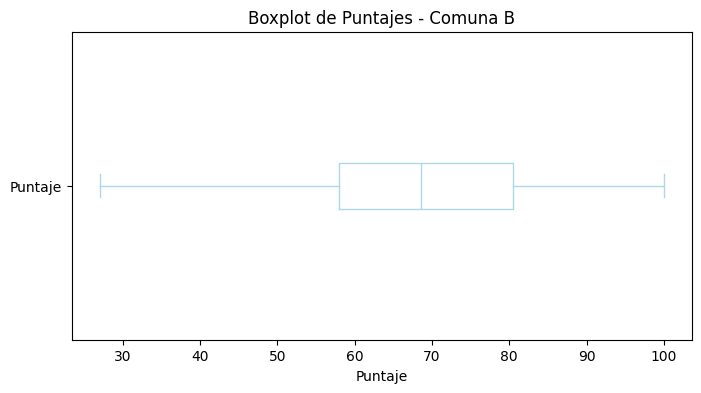

In [75]:
import matplotlib.pyplot as plt

# Generar boxplot para la columna Puntaje de df_b
df_b['Puntaje'].plot(kind='box', vert=False, figsize=(8, 4), color='lightblue')
plt.title('Boxplot de Puntajes - Comuna B')
plt.xlabel('Puntaje')
plt.show()

# Detección de outliers

In [80]:
q1=df_a['Puntaje'].quantile(0.25)
q3=df_a['Puntaje'].quantile(0.75)
iqr=q3-q1

In [81]:
LI=q1-1.5*iqr
LS=q3+1.5*iqr
print(LI,LS)

39.97829517599973 103.79640625337731


In [86]:
df_a.shape

(500, 5)

In [85]:
df_a[(df_a['Puntaje']<=LI)|(df_a['Puntaje']>=LS)] #identificación de outlier

,Puntaje,Edad,Género,Escuela,Comuna
54,33.425257,18,M,Subvencionada,Comuna A
176,23.439703,15,M,Pública,Comuna A


In [87]:
df_a=df_a[(df_a['Puntaje']>=LI)&(df_a['Puntaje']<=LS)] #eliminando outlier
df_a.shape

(498, 5)

In [88]:
df_completo=pd.concat([df_a,df_b])
df_completo

,Puntaje,Edad,Género,Escuela,Comuna
0,56.581818,14,F,Pública,Comuna A
1,64.910585,15,M,Privada,Comuna A
2,72.569686,16,F,Pública,Comuna A
3,85.635518,15,F,Privada,Comuna A
4,98.943627,17,M,Pública,Comuna A
...,...,...,...,...,...
475,67.634269,15,M,Pública,Comuna B
476,87.420682,16,M,Pública,Comuna B
477,84.586093,16,M,Privada,Comuna B
478,49.193243,14,M,Pública,Comuna B


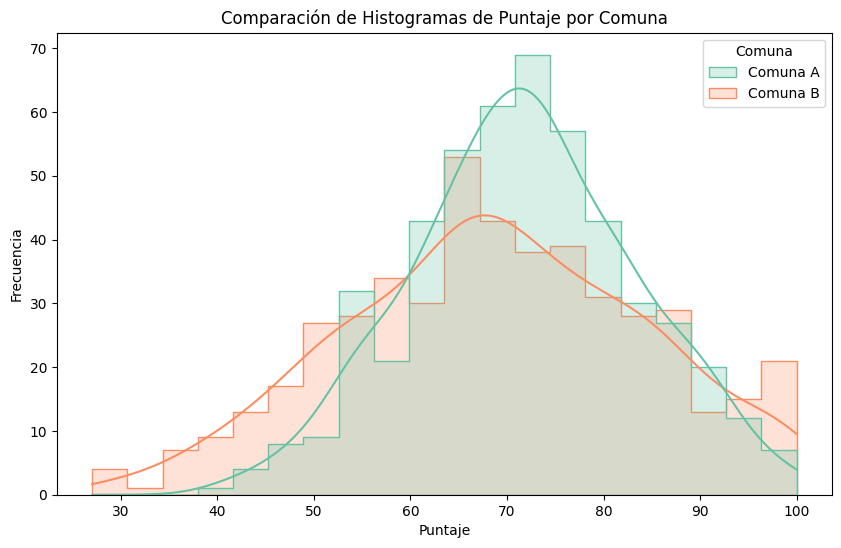

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df_completo, x='Puntaje', hue='Comuna', kde=True, element='step', palette='Set2')

plt.title('Comparación de Histogramas de Puntaje por Comuna')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.show()

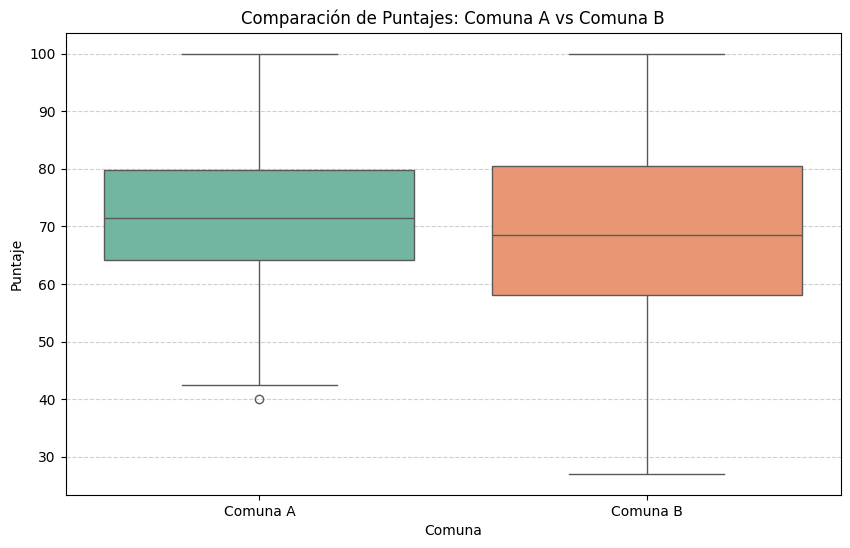

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generar un boxplot comparativo de Puntaje por Comuna
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_completo, x='Comuna', y='Puntaje', hue='Comuna', palette='Set2', legend=False)

plt.title('Comparación de Puntajes: Comuna A vs Comuna B')
plt.xlabel('Comuna')
plt.ylabel('Puntaje')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()